# Smartknower Major Project : Corona Mask Detection using CNN
## Name : REENU MARIA JERRY 

### Batch : AI 'Dec 2020 - Jan 2021

Tasks:
1.	Build a Neural Network, to classify "mask" and "without_mask" images.
2.	Using opencv, predict on each image in a webcam video( whether it belongs to "mask" or "without_mask" image). Round a rectangle on the detected face, and also put a text above that rectangle, depicting whether it is a masked or a non-masked image


## Importing libraries

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import keras
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout
from keras.optimizers import Adam

## Preparing the Data

In [ ]:
Features = []
Target = []
folders = ["without_mask","with_mask"]
for i in range(len(folders)):
    ImageNames=os.listdir("C:\\Users\\Jatin_ahuja\\Downloads\\project_data"+ "\\" + folders[i])
    for name in ImageNames:
            ImageAsArray = cv2.imread("C:\\Users\\Jatin_ahuja\\Downloads\\project_data" + "\\" + folders[i]+"\\"+name)
            ImageAsArray = cv2.resize(ImageAsArray,(128,128))
            Features.append(ImageAsArray)
            Target.append(i)
    print("Inside folder:",folders[i])        

Inside folder: without_mask
Inside folder: with_mask


In [ ]:
Features=np.array(Features)

In [ ]:
Target=np.array(Target)

In [ ]:
Features.shape

(1376, 128, 128, 3)

In [ ]:
Target.shape

(1376,)

## Splitting data into train and test dataset

In [ ]:
train_features,test_features,train_target,test_target = train_test_split(Features,Target,test_size=0.2)

In [ ]:
train_features.shape


(1100, 128, 128, 3)

In [ ]:
test_features.shape

(276, 128, 128, 3)

In [ ]:
def preprocessing(img):
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)    #BGR to grayscale conversion
    img=img/255                                 #normalization
    return img

In [ ]:
train_features=list(map(preprocessing,train_features))

In [ ]:
test_features=list(map(preprocessing,test_features))

In [ ]:
train_features=np.array(train_features)

In [ ]:
test_features=np.array(test_features)

In [ ]:
train_features.shape

(1100, 128, 128)

In [ ]:
test_features.shape

(276, 128, 128)

In [ ]:
train_features=train_features.reshape(1100, 128, 128,1)

In [ ]:
test_features=test_features.reshape(276, 128, 128,1)

## Generating new images by applying shifts, rotation etc to previous ones

In [ ]:
dataGen=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1,rotation_range=10)

In [ ]:
dataGen.fit(train_features)

In [ ]:
train_features.shape

(1100, 128, 128, 1)

In [ ]:
batches=dataGen.flow(train_features,train_target,batch_size=20)

In [ ]:
len(batches)

55

In [ ]:
batches

In [ ]:
x_batch,y_batch=next(batches)

In [ ]:
x_batch.shape

(20, 128, 128, 1)

In [ ]:
y_batch.shape

(20,)

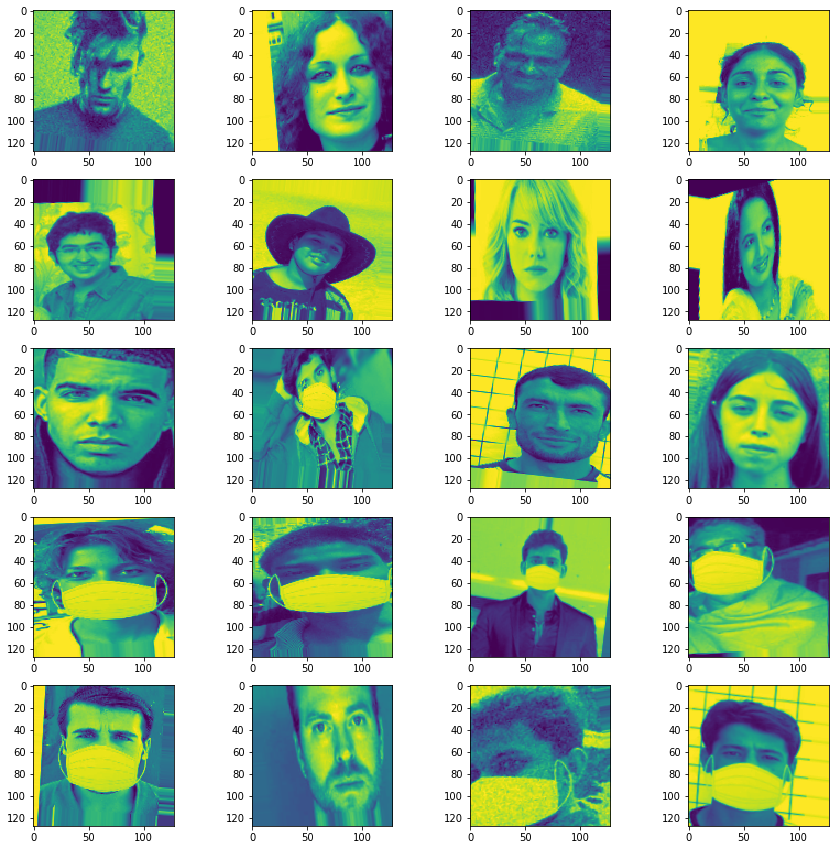

In [ ]:
plt.figure(figsize=(15,15))
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.imshow(x_batch[i].reshape(128,128))
plt.show()

In [ ]:
train_target.shape

(1100,)

In [ ]:
train_target=to_categorical(train_target,2)

In [ ]:
test_target=to_categorical(test_target,2)

## Specifying the architecture of the model

In [ ]:
def myModel():
    model=Sequential()
    model.add(Conv2D(60,(5,5),input_shape=(128,128,1),activation="relu"))
    model.add(Conv2D(60,(5,5),activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(30,(3,3),activation="relu"))
    model.add(Conv2D(30,(3,3),activation="relu"))
    model.add(Conv2D(30,(3,3),activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(500,activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(2,activation="softmax"))
    model.compile(Adam(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])
    return model

In [ ]:
model=myModel()

## Compiling and Fitting the model

In [ ]:
model.compile(Adam(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(dataGen.flow(train_features,train_target,batch_size=20),epochs=20)

Epoch 1/20
55/55 [==============================] - 154s 3s/step - loss: 0.7078 - accuracy: 0.5600
Epoch 2/20
55/55 [==============================] - 149s 3s/step - loss: 0.5589 - accuracy: 0.7305
Epoch 3/20
55/55 [==============================] - 147s 3s/step - loss: 0.4099 - accuracy: 0.8000
Epoch 4/20
55/55 [==============================] - 146s 3s/step - loss: 0.4154 - accuracy: 0.8176
Epoch 5/20
55/55 [==============================] - 144s 3s/step - loss: 0.2597 - accuracy: 0.8958
Epoch 6/20
55/55 [==============================] - 130s 2s/step - loss: 0.2719 - accuracy: 0.8889
Epoch 7/20
55/55 [==============================] - 124s 2s/step - loss: 0.2443 - accuracy: 0.8992
Epoch 8/20
55/55 [==============================] - 119s 2s/step - loss: 0.1923 - accuracy: 0.9169
Epoch 9/20
55/55 [==============================] - 110s 2s/step - loss: 0.2406 - accuracy: 0.8997
Epoch 10/20
55/55 [==============================] - 114s 2s/step - loss: 0.2288 - accuracy: 0.9160
Epoch 11/

## Making predictions

In [ ]:
predictions = model.predict(test_features)

In [ ]:
predictions[0]

array([0.15574633, 0.84425366], dtype=float32)

In [ ]:
np.argmax(predictions[0])

1

In [ ]:
test_target[0]

array([0., 1.], dtype=float32)

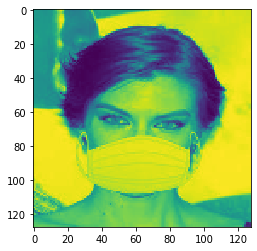

In [ ]:
plt.imshow(test_features[0].reshape(128,128))
plt.show()

In [ ]:
predictions[20]

array([8.958896e-04, 9.991041e-01], dtype=float32)

In [ ]:
np.argmax(predictions[20])

1

In [ ]:
test_target[20]

array([0., 1.], dtype=float32)

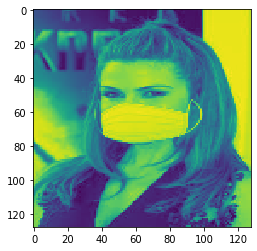

In [ ]:
plt.imshow(test_features[20].reshape(128,128))
plt.show()

In [ ]:
test_target.shape

(276, 2)

In [ ]:
predictions[200]

array([0.9988788 , 0.00112122], dtype=float32)

In [ ]:
np.argmax(predictions[200])

0

In [ ]:
test_target[200]

array([1., 0.], dtype=float32)

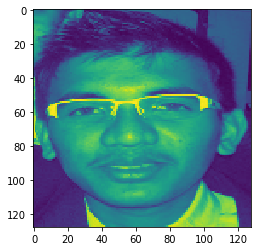

In [ ]:
plt.imshow(test_features[200].reshape(128,128))
plt.show()

In [ ]:
predictions[165]

array([1.594685e-05, 9.999840e-01], dtype=float32)

In [ ]:
np.argmax(predictions[165])

1

In [ ]:
test_target[165]

array([0., 1.], dtype=float32)

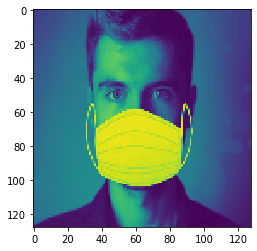

In [ ]:
plt.imshow(test_features[165].reshape(128,128))
plt.show()

In [ ]:
import cv2

def getClassName(classNo):
    if   classNo == 1: return 'with mask'
    elif classNo == 0: return 'without mask'

## Predicting on webcam images

In [ ]:
cap = cv2.VideoCapture(0)
cap.set(3,640)
cap.set(4,480)
cap.set(10,180)


In [ ]:
while True:
    message,imgOriginal=cap.read()
    img=np.asarray(imgOriginal)
    img=cv2.resize(img,(128,128))
    img=preprocessing(img)
    img=img.reshape(1,128,128,1)
    cv2.putText(imgOriginal,"Class",(20,35),cv2.FONT_HERSHEY_TRIPLEX,1,(23,120,255),2)
    cv2.putText(imgOriginal,"Probability",(20,75),cv2.FONT_HERSHEY_TRIPLEX,1,(23,120,255),2)
    probabilities=model.predict(img)
    classIndex=model.predict_classes(img)
    maxprob=np.amax(probabilities)
    if maxprob>0.75:
        cv2.putText(imgOriginal,getClassName(classIndex),(120,35),cv2.FONT_HERSHEY_TRIPLEX,1,(23,120,255),2)
        cv2.putText(imgOriginal,str(maxprob) + "%",(120,75),cv2.FONT_HERSHEY_TRIPLEX,1,(23,120,255),2)
    cv2.imshow("Result",imgOriginal)
    break
    

In [ ]:
import jovian

In [ ]:
jovian.log_hyperparams(batch_size=20, epochs=20, lr=0.001)

[jovian] Hyperparams logged.


In [ ]:
jovian.log_metrics(train_accuracy=0.9507)

[jovian] Metrics logged.


In [ ]:
jovian.commit(project="corona_mask_detection_cnn");

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
